In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [154]:
a = 0.2
b = 0.3
ep = 0.03
D = 0.01

Nt = 1001
Nx = 51

t = np.linspace(0,10,Nt)
x = np.linspace(0,1,Nx)

deltax = x[1] - x[0]
deltat = t[1] - t[0]

print(deltax, deltat)

0.02 0.01


a)

In [25]:
#Parámetro de difusión

lambda_ = (D*deltat)/deltax**2

print(lambda_)

0.2403403403403404


El parámetro de difusión (lambda_) es menor que 1/2

b)

In [76]:
U = np.random.uniform(0, 0.3, Nt)
W = np.zeros(Nt)

c)

In [77]:
#Fronteras
def InitU():
    U = np.zeros((Nt,Nx))
    
    U[:,0] = 0.1
    U[:,-1] = 0.2
    
    return U

In [78]:
U = InitU()

In [155]:
def InitW():
    W = np.zeros((Nt,Nx))
    
    W[:,0] = 0.
    W[:,-1] = 0.
    
    return W

In [156]:
W = InitW()

d)

In [157]:
def GetSolution():
    
    for l in tqdm(range(1,len(t)-1)):
        for i in range(1,len(x)-1):
            U[l+1,i]=0.01*(1/2)*(U[l,i+1]-2*U[l,i]+U[l,i-1])-0.01*U[l,i]*(U[l,i]-0.2)*(1-U[l,i])+W[l,i]
            
            

    for l in tqdm(range(1,len(t)-1)):
        for i in range(1,len(x)-1):             
            W[l+1,i] = 0.03*0.01*(U[l,i]-0.3*W[l,i]) + W[l,i] 
    


In [158]:
GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 6486.68it/s]


<IPython.core.display.Javascript object>


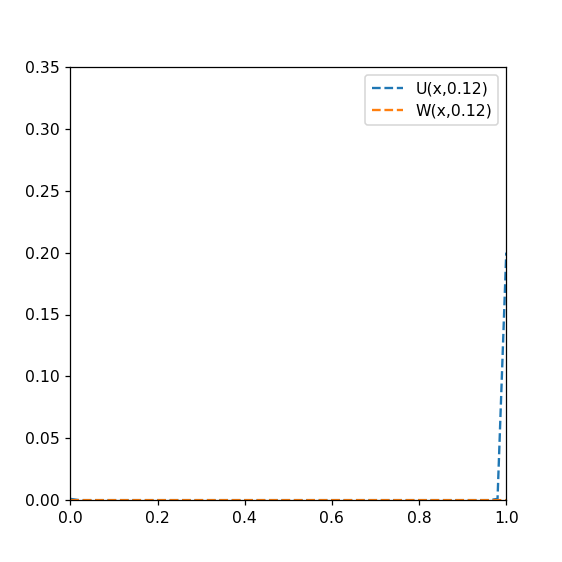

In [159]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    
    ax.clear()
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.35)
    
def Update(i):
    
    init()
    GetSolution()
    ax.plot(x,U[i,:],'--', label=r'U(x,%.2f)' %(t[i]))
    ax.plot(x,W[i,:],'--', label=r'W(x,%.2f)' %(t[i]))
    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)